In [8]:
#Import the required packages
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [9]:
img1 = cv.imread('image12.jpg')
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150, apertureSize=3)

lines = cv.HoughLines(edges, 1, np.pi/180, 200)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img1,(x1,y1),(x2,y2),(0,0,255),2)

In [31]:
# img1=cv.imread("image12.jpg")

img2=cv.imread("Image 9.jpg",cv.IMREAD_GRAYSCALE)

img2 = np.float32(img2)

img2.shape

plt.imshow(img2)

In [10]:
# Convert to grayscale
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
# Smoothing the image
# Apply median filter
gray = cv.medianBlur(gray, 5)

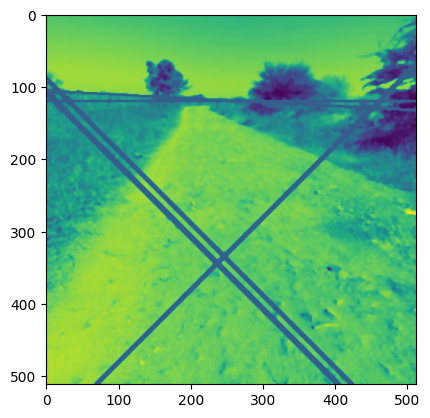

In [11]:
plt.imshow(gray)

In [20]:
# Perform spatial fuzzy clustering
num_clusters = 3
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
flags = cv.KMEANS_PP_CENTERS
image2 = np.float32(gray.reshape((-1, 1)))
ret, label, center = cv.kmeans(image2, num_clusters, None, criteria, 10, flags)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((gray.shape))


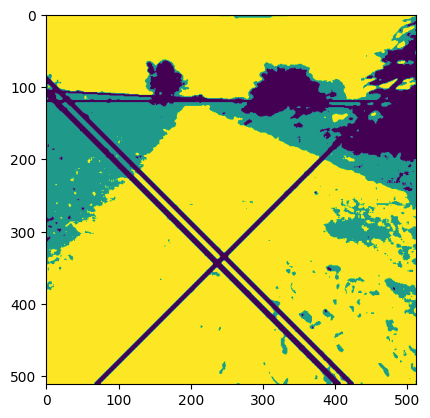

In [21]:
plt.imshow(res2)

In [22]:
print(center)

[[172]
 [ 68]
 [124]]


In [23]:
print(res)
print(res.shape)


[[172]
 [172]
 [172]
 ...
 [172]
 [172]
 [124]]
(262144, 1)


In [24]:
# Apply Otsu's method to determine threshold value
ret2,thresh = cv.threshold(res2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

In [25]:
# Remove small clusters
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2) #First perfom Erosion then Dilation

In [26]:
# Fill in gaps
kernel = np.ones((15,15),np.uint8)
closing = cv.morphologyEx(opening,cv.MORPH_CLOSE,kernel, iterations = 3) #First perfom Dilation then Erosion 

In [28]:
# Show output
cv.imshow('Input Image', img1)
cv.imshow('Unpaved Road Detection', closing)
cv.waitKey(0)
cv.destroyAllWindows()